In [240]:
def Equacao1iteracao (Tgelo, t):
    Qrad=(e/albedo)*(I*(A*sin_teta))
    Qar=(A*hgelo)*(-Tgelo+Ta)
    dTdt=(1/(m*c))*(Qrad+Qar)
    return dTdt
    

In [241]:
import numpy as np

listaTempo=np.arange(0,100,0.001) #do ano 2000, até o ano de 2100. Logo, a escala está em anos.

e=0.97 #eficiencia de absorção
A=225*10**11 #m quadrado permafrost
hgelo=4.43 #W/m2*k
albedo=0.7 #unidade?
m=2.2008*(10**16) #kg
sin_teta=0.39 #seno de 23 graus (ângulo de irradiação)
I=342.5 #irradiaçao media
c=0.5

Ta=288.15 #regiões que tem gelo, possuem temperatura ambiente baixa , logo, 0ºC, 273.15 Kelvin
Tgelo_inicial=253.15



36969
36.969


<function matplotlib.pyplot.show>

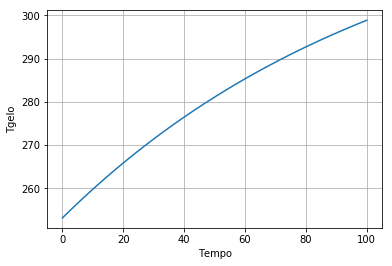

In [242]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt 

Tgelo=odeint(Equacao1iteracao,Tgelo_inicial,listaTempo)

index=0
tempo=0
for i in range (len(Tgelo)):
    if 273.15<Tgelo[i]<275:
        index=i
        tempo=listaTempo[i]
        
print(index)
print(tempo)

#plt.plot(listaTempo[:index], Tgelo[:index])
plt.plot(listaTempo, Tgelo)
plt.xlabel('Tempo')
plt.ylabel('Tgelo')
plt.grid(True)
plt.show

        

<function matplotlib.pyplot.show>

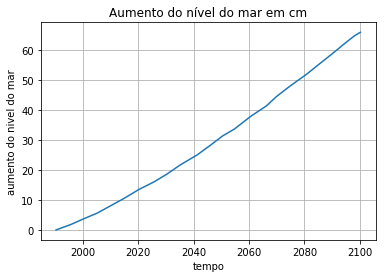

In [243]:

#dados reais

listatempoAnos=[1990.3452,
1995.5251,
2000.244,
2005.1932,
2010.1414,
2015.0895,
2020.2672,
2025.676,
2030.1635,
2035.3405,
2041.3239,
2046.1553,
2050.5264,
2054.784,
2060.6501,
2066.2876,
2069.8525,
2074.6836,
2080.7805,
2085.9565,
2090.6726,
2094.9282,
2098.149,
2100.22]

listaAumento=[0.19135147,1.9242336,3.8442986,5.765555,8.255506,10.745457,13.615729,16.108063,18.59563,21.845034,25.098604,28.34622,31.401888,33.6987,37.8995,41.34085,
44.39235,47.82953,51.841957,55.660053,59.096638,62.341278,64.63273,65.78084]

plt.plot(listatempoAnos, listaAumento)
plt.grid(True)
plt.title('Aumento do nível do mar em cm')
plt.xlabel('tempo')
plt.ylabel('aumento do nivel do mar')
plt.show

In [244]:
#segunda iteração
#quando a temperatura está maior que zero graus e começa a te derretimento

def derretimento (Mgelo, t):
    Qrad=(e/albedo)*(I*(A*sin_teta))
    Qar=(A*hgelo)*(-0+Ta)
    Ugelo=Qar+Qrad
    dMdt=Ugelo/l
    return dMdt


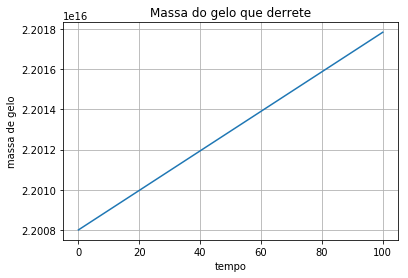

In [245]:
Mgelo_inicial=m
l=334000 #J/Kg (calor latente)

Mgelo=odeint(derretimento,Mgelo_inicial,listaTempo)


plt.plot(listaTempo, Mgelo)
plt.xlabel("tempo")
plt.ylabel("massa de gelo")
plt.title("Massa do gelo que derrete")
plt.grid(True)

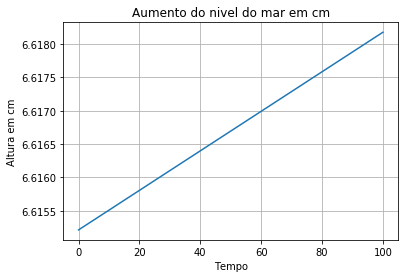

In [246]:
#pegar a massa de gelo derretida e converter para a altura que ela representa em aumento do nivel do mar

densidade=917 #kg por metro cubico
area=3.628*10**14   #metro quadrado
Altura_aumento=[]
for e in Mgelo:
    Vgelo=e/densidade
    altura_aumento=Vgelo*100/area
    Altura_aumento.append(altura_aumento) # unidade de gelo derretido em cm quadrado (unidade igual a de validação)

plt.plot(listaTempo, Altura_aumento)
plt.xlabel("Tempo")
plt.ylabel("Altura em cm")
plt.title("Aumento do nivel do mar em cm")
plt.grid(True)
    

In [247]:
#uso do modelo para diferentes temperaturas (delta t)

listaTemperatura=np.arange(273.15, 293.15, 2)

for e in listaTemperatura:
    Tgelo=odeint(Equacao1iteracao,Tgelo_inicial,listaTempo)

    

